In [1]:
import tensorflow as tf #Data augmentation with dropout
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
image_height, image_width = 48, 48

In [3]:
train_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/train',
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

validation_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/validation',
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

Found 11157 files belonging to 2 classes.
Found 2785 files belonging to 2 classes.


In [4]:
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [5]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\frat5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data=validation_dataset
)


Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.6077 - loss: 3.8651 - val_accuracy: 0.6553 - val_loss: 0.6577
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.6378 - loss: 0.6535 - val_accuracy: 0.6589 - val_loss: 0.6427
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.6402 - loss: 0.6515 - val_accuracy: 0.6564 - val_loss: 0.6423
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.6388 - loss: 0.6481 - val_accuracy: 0.6564 - val_loss: 0.6371
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6399 - loss: 0.6449 - val_accuracy: 0.6488 - val_loss: 0.6578
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6377 - loss: 0.6500 - val_accuracy: 0.6549 - val_loss: 0.6646
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6373 - loss: 0.6440 - val_accuracy: 0.6553 - val_loss: 0.6444
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.6377 - loss: 0.6395 - 

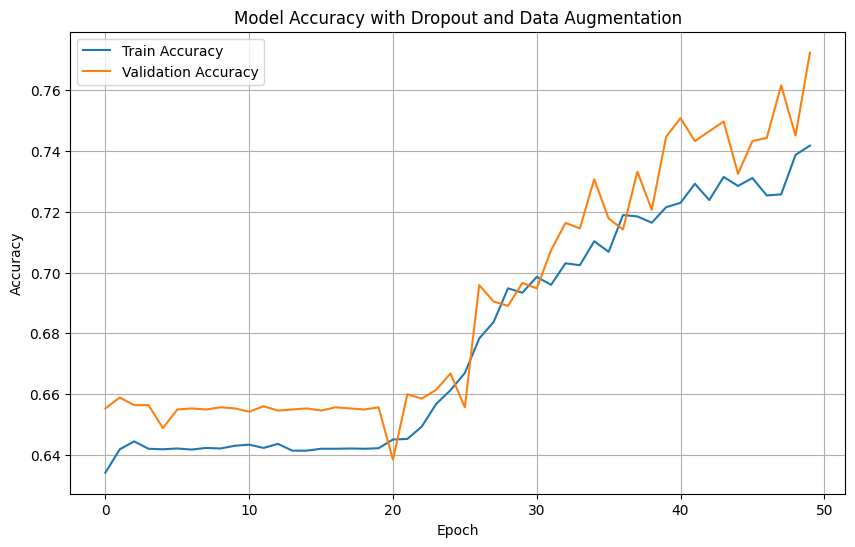

In [8]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout and Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Save the model with the '.keras' extension
model.save('haaugmentationdroput_model.keras')  # This specifies the Keras native format